# **Cinematic Dynamics: Exploring Film Genres, Release Timing, and Success Factors**

# P2 : Project Proposal and Initial Analyses

> - 😀 Name: **Léa Blinière**, **Yanruiqi Yang**, **Pierre-Hadrien Levieil**,**Jason Mina**, **Salim Cherkaoui**
> - 🪪 SCIPER: **283670**, **346510**, **324420**, **355142**



# Table of Contents
- **[PART 1: Data Exploration and Preparation](#1)**
    - [1.1 Load the Data and Visual Inspection](#11)
    - [1.2 Data Cleaning](#12)
    - [1.3 Data Merging](#13)
- **[PART 2: Addressing Our Research Questions](#2)**
    - [2.1 Research Question 1: Recurring Patterns and Impactful Factors](#21)
    - [2.2 Research Question 2: Analysis on Pursuing Oscar's](#22)
    - [2.3 Research Question 3: Analysis on Box Office Revenues and Ratings](#23)
    - [2.3 Research Question 4: Actors' Influence](#24)


### **Import Librairies**

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

from preprocessing import *
from plot_functions import *
from sklearn.linear_model import LogisticRegression
from utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Load Path**

### GOOGLE DRIVE 

In [ ]:
# Data Path
DATA_RESULTS = 'Data_results/'

MOVIE_PATH = get_path(
    "https://drive.google.com/file/d/1gIeripRBttNRhJGQKmr-8zeZVLIPXo8s/view?usp=sharing"
)

# Additional data
OSCAR_PATH = get_path(
    "https://drive.google.com/file/d/1IWOH_y_Ikai-6MxcX5WnFm2jqOKCQVQf/view?usp=sharing"
)

IMBD_TITLE_PATH = get_path(
    "https://drive.google.com/file/d/1t6_kQ7tfLsORItYH8f17_EwRQgEm-t69/view?usp=sharing"
)

IMDB_RATING_PATH = get_path(
    "https://drive.google.com/file/d/10EHNScttfKueXibTpASCq2IejROCtEkT/view?usp=sharing"
)

MOVIE_LENS_PATH = get_path(
    "https://drive.google.com/file/d/1Y05axxM4pilu70OdPoxJOdu0AwyetZ1v/view?usp=sharing"
)

# Load Data already preprocessed
IMBD_MERGE_PATH = get_path(
    "https://drive.google.com/file/d/1NgId8mT7LZZVDVNH0qCz7xd9ft2wyZUI/view?usp=sharing"
)

DATA_CLEAN_PATH = get_path(
    "https://drive.google.com/file/d/1hBC1rdYr0nYfeycCAp6E_fisvYqZkO88/view?usp=sharing"
)

<a name="1"></a>
## **PART 1: Data Exploration and Preparation**
---

In this section, we will proceed with data preparation for our project. To accomplish this, we will utilize three datasets:

1. **Movie Metadata Dataset:** This dataset contains information about 81,741 films. It was extracted from the Freebase database dated November 4, 2012. It spans a period from the year 1915 to 2012, encompassing a wide range of historical films. Among the available information, we will specifically focus on elements such as the country of origin, box office revenue, and release date of each film.

2. **Character Metadata Dataset:** This dataset is aligned with the movie metadata dataset and includes character names for each movie as well as information regarding the actors playing them, such as age, gender, name, etc. 

3. **IMDb Dataset:** IMDb is a popular online database dedicated to movies, TV shows, and celebrities. IMDb provides various datasets for research purposes, including information about movies, TV series, and their associated data. We will use this dataset to extract user ratings for films.

4. **Award Dataset:** Derived from the "Academy Awards Dataset," this dataset contains information about films selected for the Oscars from the very first Oscars ceremony to the present day.

4. **MovieLens Dataset:** This MovieLens dataset is a widely used dataset in the field of recommender systems, containing millions of movie ratings and tag assignments collected from the MovieLens website. It offers detailed information about movies, users, and their interactions, making it an essential resource for research and development in personalized recommendation algorithms. We will use it due to its extensive collection of movie ratings, which provides valuable insights for analyzing viewer preferences and movie popularity trends (The notebook additional_dataset.ipynb contains both the code and the explanations detailing how we preprocessed this dataset to construct our own tailored additional dataset).

Once we have loaded these various datasets, we will proceed with a data preprocessing phase to make them suitable for our analysis.

### **1.1 Load the Data and Visual Inspection**

### Movie Metadata 

In [ ]:
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages",
    "Movie countries",
    "Movie genres"
]
df_movie = pd.read_csv(MOVIE_DATASET, sep='\t', header=None, names=column_names)

### Character Metadata 

In [ ]:
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID",
]
df_character = pd.read_csv(CHARACTER_DATASET, sep='\t', header=None, names=column_names)
df_character.head(1)

### IMBd Dataset

In [ ]:
column_names = [
    "titleId",
    "ordering",
    "title",
    "region",
    "language",
    "types",
    "attributes",
    "isOriginalTitle"
]
df_imbd = pd.read_csv(IMDB_DATASET, sep='\t', header=None, names=column_names)
df_imbd.drop(0, inplace=True)
df_imbd.head(1)

In [ ]:
column_names = [
    "titleId",
    "averageRating",
    "numVotes"
]
df_rating = pd.read_csv(IMDB_RATING_DATASET, sep='\t', header=None, names=column_names, low_memory=False)
df_rating.drop(0, axis = 0, inplace = True)
df_rating.head(1)

In [8]:
# Merge the two DataFrames based on the 'titleId' column, using an inner join.
df_imbd_ = pd.merge(df_rating, df_imbd, left_on='titleId', right_on='titleId', how='inner')

# Drop unnecessary columns from the result DataFrame.
df_imbd_.drop(['titleId', 'ordering', 'region', 'language', 'types', 'attributes', 'isOriginalTitle'], axis=1, inplace=True)

# Remove duplicate rows in the DataFrame.
df_imbd_.drop_duplicates(inplace=True)

# Define the path where the merged DataFrame will be saved as a CSV file.
save_path = DATA_SAVE_FOLDER + "df_rating.csv"

# Save the cleaned and merged DataFrame to a CSV file, without including the index and handling encoding errors.
df_imbd_.to_csv(save_path, index=False, encoding='utf-8', errors='ignore')

In [9]:
df_imbd_.head(1)

,averageRating,numVotes,title
0,5.7,2007,Карменсіта


### Award Dataset 

In [10]:
column_names = [
    "Movie Year",
    "Ceremony Year",
    "Ceremony", 
    "Category",
    "Name",
    "Movie name",
    "Winner"
]
df_award = pd.read_csv(OSCAR_DATASET, header=None, names=column_names).drop(0)
df_award.head(1)

,Movie Year,Ceremony Year,Ceremony,Category,Name,Movie name,Winner
1,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False


### Movie Lens Dataset

As we aim to study the popularity and success of movies, analyzing the reviews provided by viewers offers valuable insights into a movie's popular success. To facilitate this, we will compile a dataset comprising movie reviews.

Additionally, in this notebook, we will gather a dataset that includes the exact release dates of movies (including the month). This is because our CMU Movie Summary Corpus dataset typically only provides the year of release.

##### Rating (reviews) dataset

##### MovieLens

[This MovieLens dataset](https://files.grouplens.org/datasets/movielens/ml-25m-README.html) is a widely used dataset in the field of recommender systems, containing millions of movie ratings and tag assignments collected from the MovieLens website. It offers detailed information about movies, users, and their interactions, making it an essential resource for research and development in personalized recommendation algorithms.

##### Sanity Check

In [11]:
file_path = 'ml-25m/ratings.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510


In [12]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check for illogical values
# We know that ratings should be on a 0-5 scale
invalid_ratings = df[(df['rating'] < 0) | (df['rating'] > 5)]

# Assuming userId and movieId should be positive integers
invalid_userId = df[df['userId'] < 1]
invalid_movieId = df[df['movieId'] < 1]

# Basic Descriptive Statistics
descriptive_stats = df.describe()

# Printing the results
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)
print("\nInvalid Ratings:\n", invalid_ratings)
print("\nInvalid User IDs:\n", invalid_userId)
print("\nInvalid Movie IDs:\n", invalid_movieId)
print("\nDescriptive Statistics:\n", descriptive_stats)

Missing Values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Duplicate Rows: 0

Invalid Ratings:
 Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Invalid User IDs:
 Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Invalid Movie IDs:
 Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Descriptive Statistics:
              userId       movieId        rating     timestamp
count  2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00  1.215601e+09
std    4.679172e+04  3.919886e+04  1.060744e+00  2.268758e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.196000e+03  3.000000e+00  1.011747e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.198868e+09
75%    1.215570e+05  8.623000e+03  4.000000e+00  1.447205e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


Missing Values: There are no missing values in any of the columns, which is great as it means we have a complete dataset.

Duplicate Rows: There are no duplicate rows in your dataset.

Invalid Ratings, User IDs, and Movie IDs: There are no entries that fall outside the expected ranges for ratings, user IDs, or movie IDs.

##### Descriptive Statistics:

- The count shows that there are 25,000,100 entries in the dataset (a lot of data).

- The mean rating is approximately 3.53, indicating a moderately high average rating across all movies.

- The std (standard deviation) for ratings is about 1.06, suggesting a reasonable spread of ratings around the mean.

- min and max values for ratings are within the expected range (0.5 to 5.0).


Overall, the dataset appears to be clean and well-structured, with no apparent issues in terms of missing values, duplicates, or illogical entries. This makes it a solid foundation for our analysis.

##### Movies' average rating

In this section of the notebook, we focus on refining our movie review dataset to ensure higher data quality and enable more accurate analysis. 

Our first step involves filtering out users who have provided fewer than 10 reviews, as well as movies that have received less than 50 reviews. This is done to concentrate on data that is both reliable and substantial. 

Next, we normalize the user ratings. This step involves subtracting the average rating of each user from their individual ratings, which helps mitigate individual rating biases. 

Finally, we calculate the normalized average rating for each movie and adjust this by adding the overall average rating back. This adjustment provides a more balanced and representative view of each movie's reception. 

This process is crucial for gaining a more accurate and meaningful insight into movie popularity and viewer preferences, forming a solid foundation for our subsequent analysis.

In [13]:
# Filter users with at least 5 reviews
user_review_counts = df['userId'].value_counts()
users_with_5_reviews = user_review_counts[user_review_counts >= 10].index
df_filtered_users = df[df['userId'].isin(users_with_5_reviews)]

# Filter movies with at least 10 reviews
movie_review_counts = df_filtered_users['movieId'].value_counts()
movies_with_10_reviews = movie_review_counts[movie_review_counts >= 50].index
df_filtered = df_filtered_users[df_filtered_users['movieId'].isin(movies_with_10_reviews)]

# Calculate average rating per user
user_avg = df_filtered.groupby('userId')['rating'].mean()

# Normalize ratings
df_filtered['norm_rating'] = df_filtered.apply(lambda x: x['rating'] - user_avg[x['userId']], axis=1)

# Calculate the normalized average rating for each movie
movie_norm_avg = df_filtered.groupby('movieId')['norm_rating'].mean()

# Optional: Add back the overall average rating
overall_avg = df_filtered['rating'].mean()
adjusted_movie_rating = movie_norm_avg + overall_avg

C:\Users\Pierre-Hadrien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


##### Replacing movie ids by the movie name

In [14]:
# Convert the Series to a DataFrame
ratings_df = adjusted_movie_rating.reset_index()

# Rename the columns to 'movieId' and 'rating'
ratings_df.columns = ['movieId', 'rating']

# Print the resulting DataFrame
print(ratings_df)

       movieId    rating
0            1  3.799459
1            2  3.260367
2            3  3.179223
3            4  2.937154
4            5  3.098408
...        ...       ...
13171   205383  3.643094
13172   205425  3.758098
13173   206499  3.149143
13174   206805  3.280014
13175   207830  3.454666

[13176 rows x 2 columns]


In [15]:
file_path = 'ml-25m/movies.csv'

# Read the CSV file into a DataFrame
names_df = pd.read_csv(file_path)

In [16]:
names_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [17]:
# Merge the DataFrames on 'movieId'
merged_df = pd.merge(names_df, ratings_df, on='movieId')

# Select only the relevant columns
final_df = merged_df[['movieId', 'title', 'rating']] 

# Print the resulting DataFrame
print(final_df)

       movieId                                   title    rating
0            1                        Toy Story (1995)  3.799459
1            2                          Jumanji (1995)  3.260367
2            3                 Grumpier Old Men (1995)  3.179223
3            4                Waiting to Exhale (1995)  2.937154
4            5      Father of the Bride Part II (1995)  3.098408
...        ...                                     ...       ...
13171   205383  El Camino: A Breaking Bad Movie (2019)  3.643094
13172   205425  Dave Chappelle: Sticks & Stones (2019)  3.758098
13173   206499     Between Two Ferns: The Movie (2019)  3.149143
13174   206805        In the Shadow of the Moon (2019)  3.280014
13175   207830            Terminator: Dark Fate (2019)  3.454666

[13176 rows x 3 columns]


In [18]:
# Remove the year from the 'title' column
final_df['title'] = final_df['title'].str.replace(r" \(\d{4}\)", "", regex=True)

final_df

C:\Users\Pierre-Hadrien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,rating
0,1,Toy Story,3.799459
1,2,Jumanji,3.260367
2,3,Grumpier Old Men,3.179223
3,4,Waiting to Exhale,2.937154
4,5,Father of the Bride Part II,3.098408
...,...,...,...
13171,205383,El Camino: A Breaking Bad Movie,3.643094
13172,205425,Dave Chappelle: Sticks & Stones,3.758098
13173,206499,Between Two Ferns: The Movie,3.149143
13174,206805,In the Shadow of the Moon,3.280014


In [19]:
final_df["title"][0]

'Toy Story'

### Movies exact dates of realease

Our analysis heavily relies on the exact release dates of movies. However, 50% of our dataset only includes the year of release, not the month. Therefore, we will endeavor to extract as many exact release dates as possible from [this Kaggle dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data). 

Additionally, this dataset contains IMDb votes and ratings, which could also prove useful for our analysis.

In [20]:
movies = pd.read_csv("archive/movies_metadata.csv",
                    usecols=["id","title","vote_average","vote_count","release_date"])

In [21]:
movies

,id,release_date,title,vote_average,vote_count
0,862,1995-10-30,Toy Story,7.7,5415.0
1,8844,1995-12-15,Jumanji,6.9,2413.0
2,15602,1995-12-22,Grumpier Old Men,6.5,92.0
3,31357,1995-12-22,Waiting to Exhale,6.1,34.0
4,11862,1995-02-10,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...
45461,439050,NaN,Subdue,4.0,1.0
45462,111109,2011-11-17,Century of Birthing,9.0,3.0
45463,67758,2003-08-01,Betrayal,3.8,6.0
45464,227506,1917-10-21,Satan Triumphant,0.0,0.0


In [22]:
# Display the first few rows of the release_date column
print(movies['release_date'].head())

# Check the data type of the release_date column
print(movies['release_date'].dtype)

# Count the number of missing or NaN values in the release_date column
print(movies['release_date'].isna().sum())

# Check the length of the date strings
print(movies['release_date'].str.len().unique())

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object
object
87
[10. nan  1.  2.]


In [23]:
# Filtering out rows where the release_date is NaN or its length is less than 7
filtered_movies = movies[movies['release_date'].notna()]
filtered_movies = filtered_movies[filtered_movies['release_date'].str.len() >= 7]

In [24]:
# Check for duplicate rows based on 'id' and 'title'
duplicate_ids = filtered_movies['id'].duplicated().sum()
duplicate_titles = filtered_movies['title'].duplicated().sum()

# Check data types
data_types = filtered_movies.dtypes

# Inspect release dates
# Assuming release_date is in string format, you might convert it to datetime if needed
invalid_release_dates = filtered_movies[~filtered_movies['release_date'].str.match(r'\d{4}-\d{2}-\d{2}')].shape[0]

# Validate vote average and count
invalid_vote_average = filtered_movies[(filtered_movies['vote_average'] < 0) | (filtered_movies['vote_average'] > 10)].shape[0]
invalid_vote_count = filtered_movies[filtered_movies['vote_count'] < 0].shape[0]

# Print results
print(f"Duplicate IDs: {duplicate_ids}")
print(f"Duplicate Titles: {duplicate_titles}")
print(f"\nData Types:\n{data_types}")
print(f"\nInvalid Release Dates: {invalid_release_dates}")
print(f"Invalid Vote Averages: {invalid_vote_average}")
print(f"Invalid Vote Counts: {invalid_vote_count}")


Duplicate IDs: 30
Duplicate Titles: 3180

Data Types:
id               object
release_date     object
title            object
vote_average    float64
vote_count      float64
dtype: object

Invalid Release Dates: 0
Invalid Vote Averages: 0
Invalid Vote Counts: 0


In [25]:
# Remove duplicate rows based on 'id'
filtered_movies = filtered_movies.drop_duplicates(subset='id')

# Re-check for duplicates and data types after filtering
duplicate_ids_after = filtered_movies['id'].duplicated().sum()
duplicate_titles_after = filtered_movies['title'].duplicated().sum()
data_types_after = filtered_movies.dtypes

# Print results after filtering
print(f"Duplicate IDs after filtering: {duplicate_ids_after}")
print(f"Duplicate Titles after filtering: {duplicate_titles_after}")
print(f"\nData Types after filtering:\n{data_types_after}")


Duplicate IDs after filtering: 0
Duplicate Titles after filtering: 3150

Data Types after filtering:
id               object
release_date     object
title            object
vote_average    float64
vote_count      float64
dtype: object


The presence of duplicate titles with different IDs in our filtered_movies DataFrame indicates that there might be different versions or releases of the same movie, or it could be a data entry error. To further refine the data, we can check if these duplicates have the same release date. If they do, it's more likely that they are indeed duplicates and should be removed. However, if the release dates differ, they might be different versions or movies with the same title released in different years.

In [26]:
# Group by title and check if there are multiple unique release dates for the same title
duplicates_with_different_dates = filtered_movies.groupby('title').filter(lambda x: len(x['release_date'].unique()) > 1)

# Display these duplicates
print("Duplicates with Different Release Dates:")
print(duplicates_with_different_dates)

# We keep the entry with the highest vote_count for each title:
cleaned_movies = duplicates_with_different_dates.sort_values(by=['title', 'vote_count'], ascending=[True, False])
#cleaned_movies = cleaned_movies.drop_duplicates(subset='title', keep='first')

# Final check for duplicates
final_duplicate_titles = cleaned_movies['title'].duplicated().sum()
print(f"\nFinal Duplicate Titles: {final_duplicate_titles}")

Duplicates with Different Release Dates:
           id release_date                  title  vote_average  vote_count
5         949   1995-12-15                   Heat           7.7      1886.0
6       11860   1995-12-15                Sabrina           6.2       141.0
16       4584   1995-12-13  Sense and Sensibility           7.2       364.0
25      16420   1995-12-15                Othello           7.0        33.0
27      17015   1995-09-27             Persuasion           7.4        36.0
...       ...          ...                    ...           ...         ...
45421   52103   1997-01-01             Pickpocket           7.2        13.0
45453  404604   2017-07-07                    Mom           6.6        14.0
45454  420346   2015-01-11      The Morning After           4.0         2.0
45460   30840   1991-05-13             Robin Hood           5.7        26.0
45463   67758   2003-08-01               Betrayal           3.8         6.0

[5454 rows x 5 columns]

Final Duplicate Title

In [27]:
# Group by 'title' and 'release_date', then sort by 'vote_count' within each group
filtered_movies_sorted = filtered_movies.sort_values(by=['title', 'release_date', 'vote_count'], ascending=[True, True, False])

# Drop duplicates, keeping the first entry in each group (the one with the highest vote count)
cleaned_movies = filtered_movies_sorted.drop_duplicates(subset=['title', 'release_date'], keep='first')

# Final check for duplicates
final_duplicate_titles = cleaned_movies['title'].duplicated().sum()
print(f"Final Duplicate Titles: {final_duplicate_titles}")

Final Duplicate Titles: 3150


In [28]:
cleaned_movies

,id,release_date,title,vote_average,vote_count
18757,55245,2010-01-01,!Women Art Revolution,4.3,2.0
30961,41371,2010-07-27,#1 Cheerleader Camp,3.4,23.0
36153,301325,2015-11-20,#Horror,3.4,53.0
23501,267752,2013-11-21,#chicagoGirl,7.0,1.0
28042,143747,1966-12-18,"$1,000 on the Black",6.0,2.0
...,...,...,...,...,...
22346,388182,2013-08-07,هیچ کجا هیچ کس,10.0,1.0
38463,120249,1974-11-05,‘Rameau’s Nephew’ by Diderot (Thanx to Dennis ...,10.0,1.0
8882,14670,1986-09-23,’Round Midnight,6.7,20.0
39033,109380,1965-02-12,…And the Fifth Horseman Is Fear,8.0,4.0


#### Merge all : movie title + movie date of release + ratings
In this section of the notebook, we perform a critical step of merging the movie titles, their respective dates of release, and the ratings. This consolidation allows us to form a comprehensive dataset that we will be using moving forward.

In [29]:
# Find common titles
common_titles = cleaned_movies[cleaned_movies['title'].isin(final_df['title'])]

# Count the number of common titles
num_common_titles = common_titles['title'].nunique()

# Print the number of common titles
print(f"Number of Common Titles: {num_common_titles}")

Number of Common Titles: 8123


In [30]:
# Merge the DataFrames on the 'title' column
# 'how' parameter is set to 'left' to keep all records from metadata_df and only add ratings where available
combined_df = pd.merge(cleaned_movies, final_df[['title', 'rating']], on='title', how='left')

In [31]:
combined_df[combined_df['title'] == 'Toy Story']

,id,release_date,title,vote_average,vote_count,rating
42721,862,1995-10-30,Toy Story,7.7,5415.0,3.799459


In [32]:
# Save the dataframe as .csv
combined_df.to_csv('combined_movies_data.csv', index=False)

In [33]:
column_names = [
    "ID",
    "Movie release date",
    "Movie name",
    "Average Vote ",
    "Vote Count",
    "Rating"
]
df_lens = pd.read_csv(MOVIE_LENS_PATH, header=None, names=column_names).drop(0)
df_lens.head(1)

,ID,Movie release date,Movie name,Average Vote,Vote Count,Rating
1,55245,2010-01-01,!Women Art Revolution,4.3,2.0,NaN


### **1.2 Data Cleaning**

### Movie Metadata 

In this initial step, we will undertake the following tasks:

1. **Format Conversion** 
   The columns "Movie languages," "Movie countries," and "Movie genres" currently store Freebase IDs, which makes it challenging to understand and interpret the data. Our first task is to convert these dictionaries containing Freebase IDs into simple strings that contain the actual language, country, or genre names.

2. **Reprocessing film languages**
   In this step, the languages associated with the films are reprocessed. Some films may have been considered "silent films," meaning they were silent and had a specified language. To simplify the analysis, these films are now identified as "silent film" in the language category. Additionally, mentions of the language "english language" are modified to simply "english" for easier processing and subsequent data analysis.

3. **Creating multiple rows for films with multiple genres, languages, or countries**
   This step aims to make data analysis more manageable by handling films with multiple genres, languages, or countries separately. Instead of having a single entry for a film with multiple characteristics, multiple distinct rows are created, each corresponding to a unique characteristic. For example, if a film has two different genres, two separate rows will be created for that film, each indicating a different genre. This allows for a more detailed and precise analysis of the data. It is also mentioned that in the future, the team may focus only on films with a single genre, a single language, and a single country to avoid potential bias caused by the multiplicity of these characteristics.

4. **Splitting the date into 3 columns: year, month, day, and adding a "month available" column**
   In this step, the dates associated with the films are broken down into three distinct parts: the year (year), the month (month), and the day (day). Additionally, a new column called "month available" is created. This column can potentially be useful if the research team seeks to complete missing data regarding the release month of the films.


In [34]:
#df_process = process_movie_data(df_movie, save_to_path=save_path)

In [35]:
df_movie = pd.read_csv("Data_Processed/df_process.csv")

In [36]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True


Since our analysis relies on the relationship that can exist between the release period of a film and other parameters, it is important to have an overview of the number of exploitable data points in our dataset.

In this dataset, there are 36429 movies with missing release month out of a total of 75478 movies.


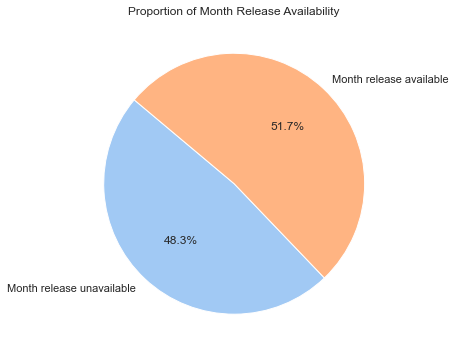

In [37]:
plot_month_release_availability(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

### Character Metadata 

In order to use our character and actor metadata, we first need to remove unecessary features:

In [38]:
df_character = df_character.drop(["Wikipedia movie ID","Movie release date","Actor date of birth",
                   "Freebase character/actor map ID","Freebase character ID","Freebase actor ID"], axis=1)

### Movie Lens Dataset

In [39]:
# Drop unnecessary columns.
df_lens.drop(['ID', 'Rating'], axis=1, inplace=True)
df_lens.head(1)

,Movie release date,Movie name,Average Vote,Vote Count
1,2010-01-01,!Women Art Revolution,4.3,2.0


### **1.3 Data Merging**

As previously seen, only 51.7% of our dataset is usable for our analysis. Using the Movie Lens dataset, which also provides the release date of each film, we will merge these two datasets in an attempt to increase the proportion of data for which the months are available.

Given that it's possible for certain films to share the same name but not be released in the same year, we will ensure to verify that the release year matches before extracting the corresponding month.

In [40]:
# Merge the two DataFrames based on the 'Movie name' column, using an inner join.
df_movie = pd.merge(df_movie, df_lens, left_on='Movie name', right_on='Movie name', how='left')

In [41]:
# Complete missing values in the 'Release Month' and 'Release Day' column.
df_movie = update_release_month_and_day(df_movie)

In [42]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Movie release date,Average Vote,Vote Count
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True,2001-08-24,4.8,299.0


In this dataset, there are 30520 movies with missing release month out of a total of 75478 movies.


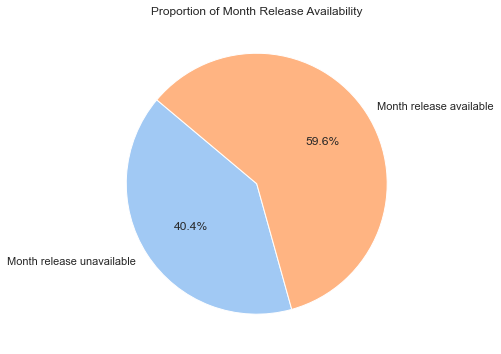

In [43]:
plot_month_release_availability(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

This step has led to an increase of approximately 10% in the proportion of data usable for our analysis. For the final analysis, we could consider further expanding our dataset, possibly by utilizing the 'Wikipedia movie ID' provided in the metadata dataset.

In [44]:
# Select only the exploitable data.
df_movie = df_movie[df_movie['Month Available']]

df_movie_with_id = df_movie.copy()
# Drop unnecessary columns.
df_movie_with_id.drop(['Wikipedia movie ID', 'Movie release date'], axis=1, inplace=True) # used to be merged with character metadata
df_movie.drop(['Freebase movie ID', 'Wikipedia movie ID', 'Movie release date'], axis=1, inplace=True) 

In [45]:
df_movie.head(5)

,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Average Vote,Vote Count
0,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True,4.8,299.0
1,Ghosts of Mars,14010832.0,98.0,English,United States of America,Science Fiction,2001,8,24,True,4.8,299.0
2,Ghosts of Mars,14010832.0,98.0,English,United States of America,Horror,2001,8,24,True,4.8,299.0
3,Ghosts of Mars,14010832.0,98.0,English,United States of America,Adventure,2001,8,24,True,4.8,299.0
4,Ghosts of Mars,14010832.0,98.0,English,United States of America,Supernatural,2001,8,24,True,4.8,299.0


### Award Dataset 

During the preprocessing of the Award dataset, we had to exclude data that was not related to films (some awards are "honorary awards" given to individuals). Subsequently, we removed unnecessary columns such as the ceremony type or the awarded person.

In [46]:
# Remove rows with missing 'Movie name' values, as these do not pertain to films.
df_award = df_award.dropna(subset=['Movie name'], axis=0)

# Drop unnecessary columns 'Ceremony Year', 'Ceremony', and 'Name'.
df_award = df_award.drop(['Ceremony Year', 'Ceremony', 'Name'], axis=1)

# Convert the 'Movie Year' column to integer data type for consistency.
df_award['Movie Year'] = df_award['Movie Year'].astype(int)

df_award.head(1)

,Movie Year,Category,Movie name,Winner
1,1927,ACTOR,The Noose,False


Then, we need to merge the Award dataset with the Movie dataset to focus on awarded movies in the main dataset.

In [47]:
# Merge datasets
df_merge_award = pd.merge(df_movie, df_award, left_on='Movie name', right_on='Movie name', how='inner')

# Handling release year
release_year_list = df_merge_award['Release Year'].to_list()
release_year_list =  [int(x) if not pd.isna(x) else 0 for x in release_year_list]
df_merge_award['Release Year'] = release_year_list

# Filtering movies with correct release year
df_merge_award = df_merge_award[df_merge_award['Release Year'] == df_merge_award['Movie Year']]
df_merge_award.head(1)

,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Average Vote,Vote Count,Movie Year,Category,Winner
0,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,ART DIRECTION,False


We can have a brief look at the dataset and clean it by filtering out valid movies records checking no duplicate with a same movie name. It is important to check how many data records are accessible for further exploration.

In [48]:
# Count the total films 
print("We have {} data for the films that have been selected for the Oscars".format(df_merge_award['Movie name'].nunique()))

# Count the films with available release month and unique value for column 'Movie name'
df_month_avail = df_merge_award[df_merge_award['Month Available'] == True].drop(['Month Available'], axis=1)
num_films_month_avail = df_month_avail['Movie name'].nunique()
print("Number of films with available release month and unique value for column 'Movie name':", num_films_month_avail)
df_month_avail.head()

We have 2668 data for the films that have been selected for the Oscars
Number of films with available release month and unique value for column 'Movie name': 2668


,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Average Vote,Vote Count,Movie Year,Category,Winner
0,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,ART DIRECTION,False
1,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,FILM EDITING,False
2,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,MUSIC (Scoring),True
3,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,MUSIC (Song),False
4,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,4.8,6.0,1938,OUTSTANDING PRODUCTION,False


### Character Metadata 

This dataset can easily be merged with the movie metadata using the freebase id. Further work will also require merging it with additional databases such as the award and IMDb ones in order to explore actor choice on ratings and awards received. 

In [49]:
df_merge_character = pd.merge(df_character, df_movie_with_id, left_on='Freebase movie ID', right_on='Freebase movie ID', how='inner')
df_merge_character = df_merge_character.drop(['Freebase movie ID'], axis=1)
df_merge_character.head(1)

,Character name,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Average Vote,Vote Count
0,Akooshay,F,1.62,NaN,Wanda De Jesus,42.0,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True,4.8,299.0


## PART 2: Addressing Our Scientific Question
---

The research questions we would like to address can be divided into four distinct parts.

**Question 1**: Are there any recurring patterns between a film's genre and its release timing within a year? If such patterns exist, do they vary based on the location of the movie, and can these insights contribute to predicting the genre of upcoming film releases in subsequent seasons?

**Question 2**: Which factors have an impact a movie's success, particularly its likelihood of winning Oscar award? How is the effect of release timing evolve over time? Is it possible to predict the Oscar probability, given some factors such as release month, country, language, etc.?

**Question 3**: In what ways is a movie's popularity affected by its release period, considering factors such as box office revenue and ratings?

**Question 4**: To what extent do the involvement of specific actors influence a film's success, including its chances of winning awards, expected box office revenue, and ratings? Additionally, can we generate actor groups based on genres and predict their probability of achieving success?

In this section, we will construct three datasets to answer these four questions, and we will perform a more extensive analysis for milestone 3.

### **1. Research Question 1**

#### **1.1 Data preparation**

For this analysis, we will focus on the film genres, the release period of the year, and the locations where they are released. Therefore, we will begin by selecting the columns of interest for our analysis.

In [50]:
df_release_info = df_movie.drop(['Movie box office revenue', 'Movie runtime', 'Movie languages', 'Vote Count', 'Average Vote '], axis=1, inplace=False)
df_release_info.drop_duplicates(inplace=True)
df_release_info.head(1)

,Movie name,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,Ghosts of Mars,United States of America,Thriller,2001,8,24,True


#### **1.2 Histogram of Release Years**

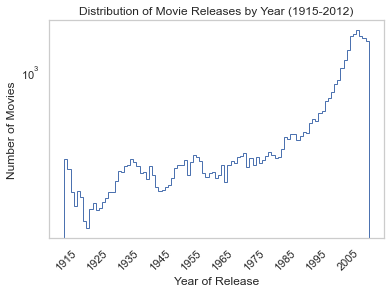

In [51]:
plot_movie_release_distribution(df_release_info.drop_duplicates(subset=['Movie name'], inplace=False))

We observe, unsurprisingly, that the number of films increases considerably with the years. However, the proportion of older films is not negligible. In the context of our study, where we will investigate patterns that may exist between the time of year and the number of film releases, we must take this factor into account and study its evolution over time.

To prepare for this future analysis, let's add a column to our dataset that contains the decades corresponding to the release of each film

In [52]:
# Create a list of film release years from the dataset.
list_release_year = df_release_info['Release Year'].to_list()

# Calculate the corresponding decade for each film release year.
list_decade = [(year//10)*10 for year in list_release_year]

# Add a new column 'Release Decade' to the dataset containing the calculated decades.
df_release_info['Release Decade'] = list_decade

df_release_info.head(1)

,Movie name,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Release Decade
0,Ghosts of Mars,United States of America,Thriller,2001,8,24,True,2000


#### **1.3 Bar Chart of Release Months**

Our study will focus on exploring the potential correlation between the time of the year and film genres. However, it is also of interest to investigate whether there are trends that are independent of the film genre.

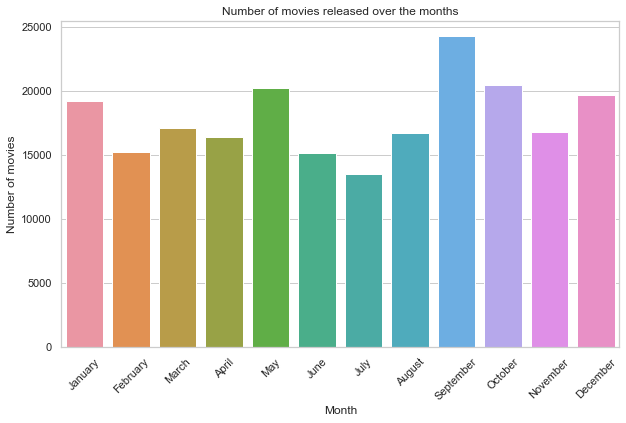

In [53]:
plot_monthly_movie_counts(df_release_info)

This bar chart allows us to conclude that the distribution of films throughout the year is not uniform; for instance, the summer months appear to have fewer releases than others. Therefore, it is necessary to differentiate, for each genre, whether the trend is driven by the overall distribution of films throughout the year or if it is specific to certain film genres.

#### **1.4 Repartition of the Main Genre**

In [54]:
print("In our dataset, we have {} film genres represented".format(df_release_info['Movie genres'].nunique()))

In our dataset, we have 356 film genres represented


In our dataset, we have a wide variety of genres represented. In the future, we may consider grouping certain genres by themes, for example, 'thriller and crime films'. This would allow us to enrich our data more intelligently. For now, we will focus on the five most represented genres in the dataset.

In [55]:
sorted_genre_counts = count_and_sort_movie_genres(df_release_info)

In [56]:
# Select the top 5 genres
selected_genres = list(sorted_genre_counts.keys())[:5]
print("Number of genres selected: ", len(selected_genres))
print("Selected genres: ", selected_genres)

Number of genres selected:  5
Selected genres:  ['Drama', 'Comedy', 'Romance Film', 'Thriller', 'Action']


In [57]:
# Filter the dataset to only include the selected genres
df_release_info = filter_movies_by_genres(df_release_info, selected_genres)

Let's observe the representation of film genres in our resulting dataset.

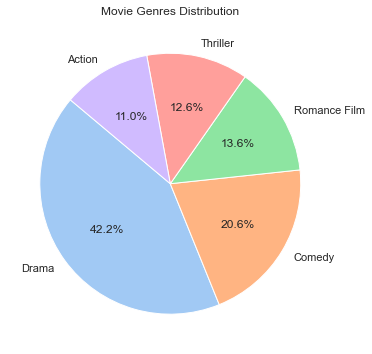

In [58]:
create_genre_pie_chart(df_release_info)

The 'drama' genre predominates significantly, while the other genres are fairly balanced among themselves.Now, we will examine the distribution of films across months based on their genres.

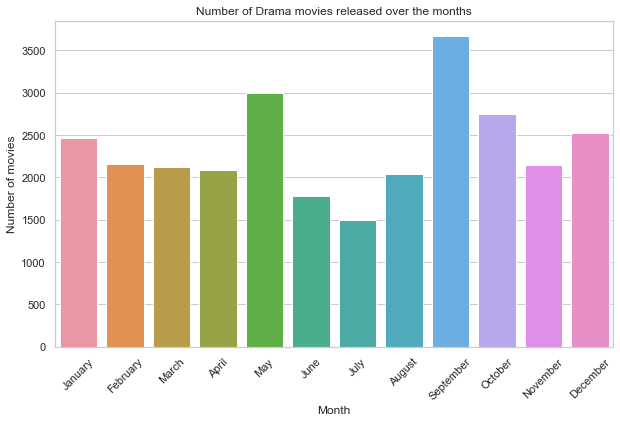

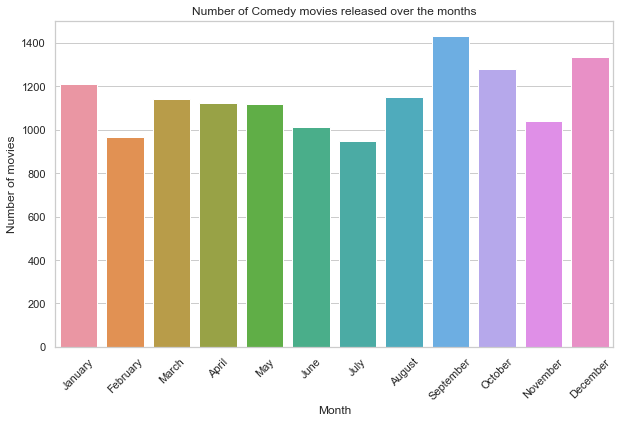

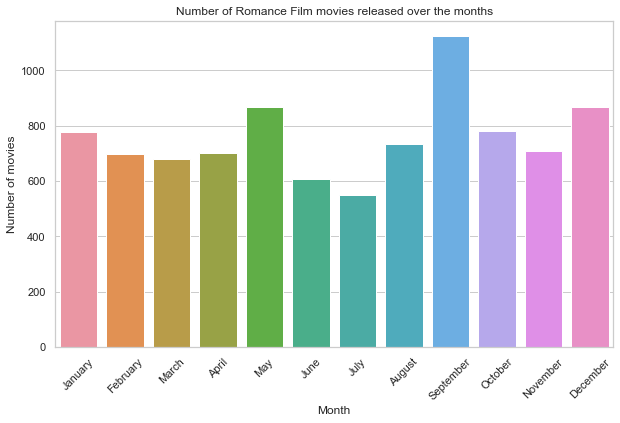

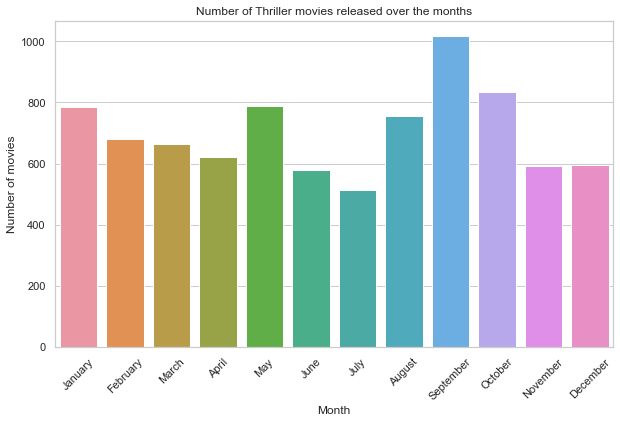

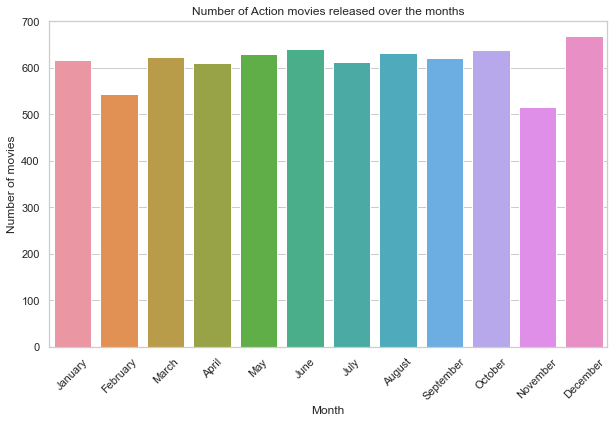

In [59]:
plot_monthly_movie_counts(df_release_info, selected_genres)

We observe significantly different distributions among genres. Action films appear to have a relatively uniform distribution throughout the year. It's worth noting that action is the only genre that doesn't experience a decline during the summer, which contradicts the general trend. It's important to mention that for the final analysis, correlation tests will be considered to confirm whether or not months can have an impact on certain genres

#### **1.5 Continent Repartition in our Dataset**

In [60]:
print("In our dataset, we have {} countries in which movies have been released".format(df_release_info['Movie countries'].nunique()))

In our dataset, we have 139 countries in which movies have been released


In our dataset, we have a wide range of countries represented. To study the link between location and the distribution of release months, we will group these countries by their continents.

In [61]:
df_release_info = assign_movie_continents(df_release_info)
df_release_info.head(1)

66832it [00:03, 21494.61it/s]


,Movie name,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Release Decade,Movie Continent
0,Ghosts of Mars,United States of America,Thriller,2001,8,24,True,2000,North America


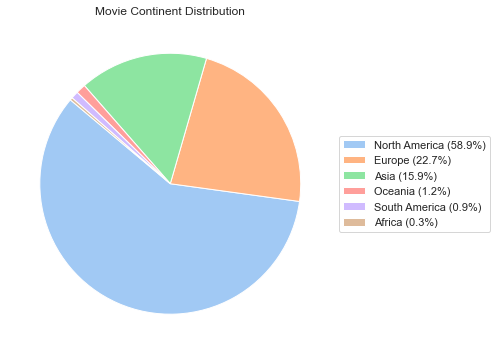

In [62]:
plot_movie_continent_distribution(df_release_info.drop_duplicates(subset=['Movie name'], inplace=False))

The pie chart shows us the proportion of each continent in our dataset. We observe that three continents represent almost the entirety of our dataset, so we will focus on these.

In [63]:
continents_to_keep  = ['Europe', 'Asia', 'North America']

In [64]:
continents_to_keep  = ['Europe', 'Asia', 'North America']
df_release_info = df_release_info[df_release_info['Movie Continent'].isin(continents_to_keep)]

**Conclusion**


Based on the observations and initial analyses, we can confidently state that there are certainly interesting aspects to explore regarding the relationship between the film's release month, its film genre, its location, and its evolution over time.

Several avenues have been discussed to enhance and group our dataset for a meaningful statistical analysis. For the final analysis, we plan to investigate the correlation between these factors, considering the influence that these parameters may have on each other.

### **2. Research Question 2:  Analysis on Pursuing Oscar's**

#### **2.1 Data preparation**

It is noticed that some records in the Award dataset are corresponding to the same movie name. This is because of spliting of genres in data preprocessing. We need therefore first remove the duplicates to make sure that each movie is uniquely represented in the dataset.

In [278]:
# Remove duplicate movies
df_merge_award_unique = df_merge_award.drop_duplicates(subset=['Movie name'], inplace=False)
df_merge_award_unique['Average Vote '] = df_merge_award_unique['Average Vote '].astype(float)
df_merge_award_unique['Vote Count'] = df_merge_award_unique['Vote Count'].astype(float)

C:\Users\Pierre-Hadrien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pierre-Hadrien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### **2.2 Release timing: When is the optimal release time?**

In order to investigate the effect of releasing timing on probability of winning Oscar, it is necessary to check the distribution of release month of movies in the dataset, which are at least selected in the scope of Oscar's prize evaluation. The results are plotted in the bar chart to make the comparison easier.

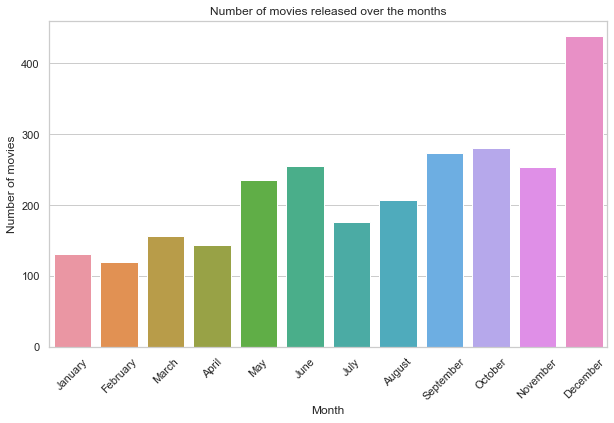

In [279]:
plot_monthly_movie_counts(df_merge_award_unique)

From the chart above, we can see that release timing of movies winning Oscar's prize is not equally distributed throughout the year. This could be explained as due to the preference of the Academy to movies released in certain periods in a year. For example, the appearance of excellent movies usually adhere to some seasonality patterns. 

However, some people may argue that there is another possibility of imbalanced number of movies released in each month. To verify that, we can run a logistic regression of whether a movie wins ('Winner') on release month. 

In [280]:
# Generate one-hot-encoding for 'Release Month'
one_hot = pd.get_dummies(df_merge_award_unique['Release Month'], prefix='Month')

# Concatenate the one-hot-encoded DataFrame with the original DataFrame
df_merge_award_one_hot = pd.concat([df_merge_award_unique, one_hot], axis=1)

# Define the target variable and the feature variables
y = df_merge_award_one_hot['Winner']
X = df_merge_award_one_hot.iloc[:, 15:]

# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Output the regressed coefficient of each generated column
coef = logreg.coef_.reshape(-1, 1)

# Convert coef to a DataFrame with Release Month as index
df_coef = pd.DataFrame(coef)
df_coef.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_coef.rename(columns={0: 'Regressor Coefficient'}, inplace=True)

# Output the DataFrame
display(df_coef)

,Regressor Coefficient
January,0.317700
February,0.058459
March,-0.061213
April,-0.006084
May,0.154911
June,-0.190977
July,-0.198395
August,0.051490
September,0.024927
October,-0.083405


We can also check the correlation between winning the award and release timing. 'Release Month' is categorical, and 'Winner' is binary, so we can use Cramér's V to check the correlation, which is specifically designed to measure the association between two categorical variables (regard binary feature as a special categorical feature). It is based on the chi-squared statistic, 

In [281]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_merge_award_unique['Release Month'], df_merge_award_unique['Winner'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Display the result
print("Cramér's V:", cramers_v)

Cramér's V: 0.052745022481659604


This indicates a very weak association between the 'Release Month' and 'Winner' variables, and directors cannot expect to try better luck to release their movies in a "good" month. However, release timing could still be considered as a factor  and control variable in the further study.

We also check the evolvement of release month of selected movies across years.

<Figure size 2160x720 with 0 Axes>

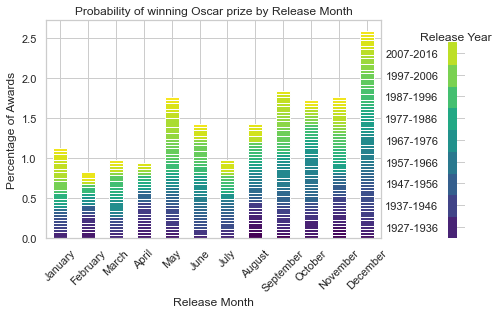

In [282]:
# Process the dataset
total_rows = df_merge_award_unique.shape[0]
df_merge_award_unique = df_merge_award_unique.copy()
df_merge_award_unique['Winner'] = df_merge_award_unique['Winner'].map({'True': 1, 'False': 0})

# Group by 'Release Month' and 'Release Year', calculate the mean of 'Winner'
percentage_true = df_merge_award_unique.groupby(['Release Month', 'Release Year'])['Winner'].sum() / total_rows * 100

# Unstack the DataFrame for easy plotting
percentage_true = percentage_true.unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(30, 10))
ax = percentage_true.plot(kind='bar', stacked=True, colormap='viridis',legend=False)

# Create a list of month names using the calendar library as xticklabel
month_names = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(range(12), month_names, rotation=45)

# Adding labels and title
plt.xlabel('Release Month')
plt.ylabel('Percentage of Awards')
plt.title('Probability of winning Oscar prize by Release Month')

# Create a separate Axes for the legend
legend_ax = plt.gca().inset_axes([1.2, 0, 0.05, 1], frameon=False)

# Custom legend every 10 years
years_to_show = range(percentage_true.columns.min(), percentage_true.columns.max() + 1, 10)
legend_labels = [f'{year}-{year+9}' for year in years_to_show]

# Plot colored rectangles on the legend Axes
for i, year in enumerate(years_to_show):
    legend_ax.add_patch(plt.Rectangle((0, i * 0.1), 0.5, 0.1, color=sns.color_palette('viridis', n_colors=len(years_to_show))[i]))

# Set legend labels
legend_ax.set_yticks([i * 0.1 + 0.05 for i in range(len(years_to_show))])
legend_ax.set_yticklabels(legend_labels)
legend_ax.set_xticks([])
legend_ax.set_title('Release Year', pad=-20)

# Display the plot
plt.show()

It is interesting to observe the facts including: 
 - in the very early years, very few movies released in June and July were selected to Oscar's competition
 - in recent years, movies released in November and December are favored

#### **2.3 Countries: Where are Oscar's award movies from?**

The next factor we consider as siginificant is the origin of movies. The first issue is to inspect is the evaluation of Oscar's prize really "fair" for movies from different countries? We have an initial check by looking at the composition of film countries.

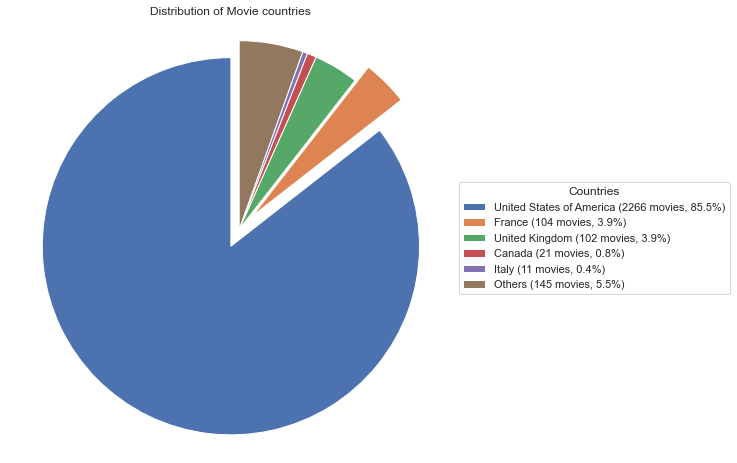

In [283]:
plot_award_distribution(df_merge_award_unique, 'countries')

It is obvious that movies from USA make up a significant majority. This could make the conclusion biased when we are evaluating a movie from a country other than USA. 

#### **2.4 Languages: Culcural identity of movies**

Another feature considered for further analysis is the movie language. We also hope to check its distribution in the dataset.

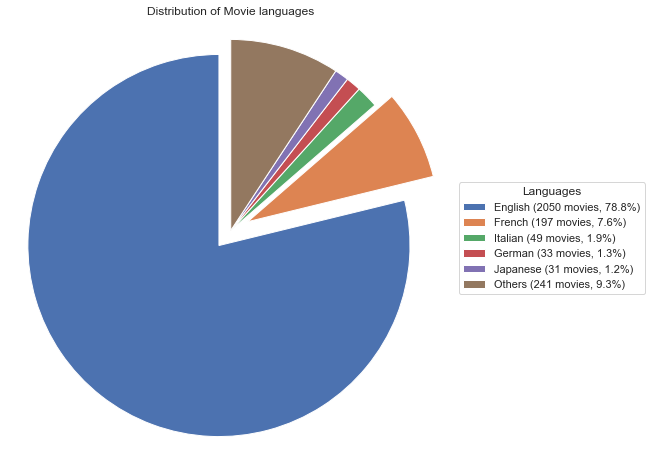

In [284]:
plot_award_distribution(df_merge_award_unique, 'languages')

Same as movie countries, English is dominant in the dataset. It is reasonable considering that USA and UK are the top 2 movie countries in the Award dataset. Similarly, we are very cautious when we have to generalize any conclusion to non-English movies because of their minority in this dataset.

In [285]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#columns = ['Release Month', 'Movie genres', 'Movie runtime', 'Winner', 'Movie box office revenue', 'Average Vote ']
columns = ['Average Vote ', 'Winner']
without_winner = columns.copy()
without_winner.remove('Winner')

df_test = df_merge_award_unique.copy()[columns]
df_test.dropna(inplace=True)

# Define the features and target variable
features = df_test[without_winner]
target = df_test['Winner']

# One-hot encode categorical features
features_encoded = pd.get_dummies(features)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.84      1.00      0.92       400
           1       0.00      0.00      0.00        74

    accuracy                           0.84       474
   macro avg       0.42      0.50      0.46       474
weighted avg       0.71      0.84      0.77       474



C:\Users\Pierre-Hadrien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pierre-Hadrien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pierre-Hadrien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_c

#### **2.5 Box Office Revenue**

To continue our analysis of research question 2, we now delve onto the other factrors impacting a movie's success. We start by looking at the box office revenue of the movies in our dataset. Our insight leads us to believe that higher box office revenues are correlated with a higher probability of winning an Oscar, which we will test via statistical analysis.

Let us first plot the box office revenue of movies based on if they received an Oscar or not.

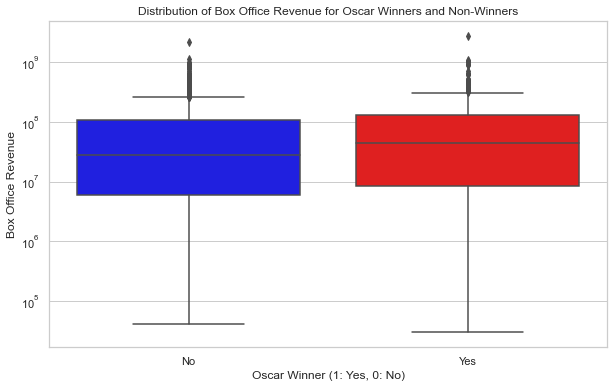

In [286]:
plot_box_office_oscars(df_merge_award_unique)

In [287]:
df_plot = df_merge_award_unique[['Winner', 'Movie box office revenue']].copy() 

# Calculate mean and standard deviation for each category
mean_winner = df_plot[df_plot['Winner'] == 1]['Movie box office revenue'].mean() / 1e6
std_winner = df_plot[df_plot['Winner'] == 1]['Movie box office revenue'].std() / 1e6

mean_non_winner = df_plot[df_plot['Winner'] == 0]['Movie box office revenue'].mean() / 1e6
std_non_winner = df_plot[df_plot['Winner'] == 0]['Movie box office revenue'].std() / 1e6

# Display the results in millions
print(f'Mean Box Office Revenue (Oscar Winners): ${mean_winner:.2f} million')
print(f'Standard Deviation Box Office Revenue (Oscar Winners): ${std_winner:.2f} million')
print()
print(f'Mean Box Office Revenue (Non-Winners): ${mean_non_winner:.2f} million')
print(f'Standard Deviation Box Office Revenue (Non-Winners): ${std_non_winner:.2f} million')

# Calculate and display the difference between the two means
mean_difference = mean_winner - mean_non_winner
print(f'\nDifference in Mean Box Office Revenue between Winners and Non-Winners: ${mean_difference:.2f} million')


Mean Box Office Revenue (Oscar Winners): $141.49 million
Standard Deviation Box Office Revenue (Oscar Winners): $274.32 million

Mean Box Office Revenue (Non-Winners): $94.29 million
Standard Deviation Box Office Revenue (Non-Winners): $164.44 million

Difference in Mean Box Office Revenue between Winners and Non-Winners: $47.20 million


As shown by the box plot and the statistics of our movies' box office revenues, we can see that the average and median box office revenue of movies that received an Oscar is higher than the average box office revenue of movies that did not receive an Oscar. We also notice that the standard deviation of the box office revenue of movies that received an Oscar is higher much higher than for those who did not, indicating more variability in this category.

Indeed, if we compare the differences between highest and lowest grossing movies that have received an Oscar, we notice a huge difference as shown bellow. Movies such as "The Times of Harvey Milk" received the Oscars for the best documentary feature in 1984 with a box office revenue of 29,802 USD, while movies such as "Avatar" received the Oscars for the art direction in 2009 with a box office revenue of 2,782,275,172 USD. This indicates that the Oscars awards do not necesserly reflect the success of a movie, which can often be the case for movies that are not blockbusters.

In [300]:
top_k_with_oscars(df_merge_award_unique, 3, 'Movie box office revenue', True)

Movie: The Times of Harvey Milk
Year: 1984
Category: DOCUMENTARY (Feature)
Movie box office revenue: 29802.00
---
Movie: Undefeated
Year: 2011
Category: DOCUMENTARY (Feature)
Movie box office revenue: 521476.00
---
Movie: Character
Year: 1997
Category: FOREIGN LANGUAGE FILM
Movie box office revenue: 713413.00
---


In [289]:
top_k_with_oscars(df_merge_award_unique, 3, 'Movie box office revenue')

Movie: Avatar
Year: 2009
Category: ART DIRECTION
Movie box office revenue: 2782275172.00
---
Movie: The Lord of the Rings: The Return of the King
Year: 2003
Category: ART DIRECTION
Movie box office revenue: 1119929521.00
---
Movie: Toy Story 3
Year: 2010
Category: ANIMATED FEATURE FILM
Movie box office revenue: 1063171911.00
---



To test wether the difference in box office revenue is statistically significant, we will perform a Welch's t-test. This test is used to test the null hypothesis that two populations have equal means. It is an adaptation of Student's t-test and is more reliable when the two samples have unequal variances and unequal sample sizes.

In [290]:
t_test_and_correlation_on_winner_vs_col(df_merge_award_unique, 'Movie box office revenue')

T-test statistic: 3.4878298099873417
T-test p-value: 0.0005025885543593558
Correlation coefficient: 0.09446720774134504
Correlation p-value: 0.0005025885543602448


The key findings of this analysis are as follows:

1) T-test Results:

- T-test statistic: 3.49
- T-test p-value: 0.0005

Conclusion: The t-test results reveal a substantial difference in box office revenue between movies that received Oscars and those that did not. The low p-value of 0.0005 indicates a high level of statistical significance. This suggests that the observed difference in box office revenue is unlikely to have occurred by random chance.

2) Correlation Analysis:

- Correlation coefficient: 0.09
- Correlation p-value: 0.0005

Conclusion: The correlation analysis indicates a significant positive correlation (coefficient of 0.09) between box office revenue and the number of Oscars won. The low p-value of 0.0005 reinforces the statistical significance of this positive correlation. Therefore, higher box office revenue is associated with an increased likelihood of receiving Oscars.

Our analysis provides compelling evidence supporting a clear relationship between box office success and Oscar recognition. The statistically significant t-test results affirm that movies with Oscars differ significantly in terms of box office revenue from those without Oscars. Additionally, the positive correlation observed further emphasizes that higher box office revenue is positively linked to an increased likelihood of receiving Oscars. This underscores the influential role of commercial success in garnering industry acclaim and recognition.

However, as we have shown previously, it is important to notice that the Oscars do not necessarily reflect the success of a movie. Indeed, the Oscars can be awarded to movies that are not blockbusters. This is why we will now look at the ratings of the movies in our dataset to see if they are correlated with the Oscars.

#### 2.6 Ratings

We will now conduct a similar analysis to the one we performed for box office revenue, but this time for ratings. We will start by plotting the ratings of movies based on if they received an Oscar or not.

In [291]:
df_merge_award_unique_filtered = df_merge_award_unique[df_merge_award_unique['Average Vote '] != 0].copy()

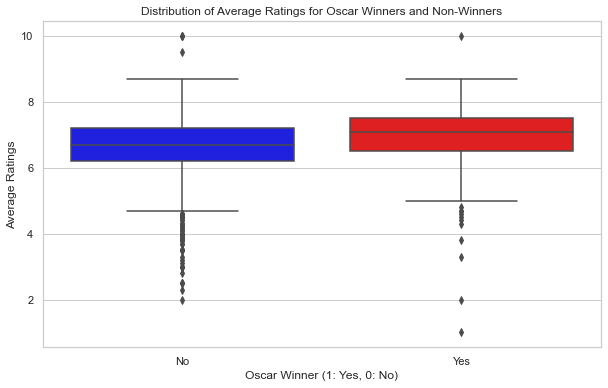

In [292]:
plot_ratings_oscars(df_merge_award_unique_filtered)

In [293]:
df_plot = df_merge_award_unique_filtered[['Winner', 'Average Vote ']].copy()  # Add a whitespace to the end of the name

# Calculate mean and standard deviation for each category
mean_winner = df_plot[df_plot['Winner'] == 1]['Average Vote '].mean()
std_winner = df_plot[df_plot['Winner'] == 1]['Average Vote '].std()

mean_non_winner = df_plot[df_plot['Winner'] == 0]['Average Vote '].mean()
std_non_winner = df_plot[df_plot['Winner'] == 0]['Average Vote '].std()

# Display the results
print(f'Mean Average Vote (Oscar Winners): {mean_winner:.2f}')
print(f'Standard Deviation Average Vote (Oscar Winners): {std_winner:.2f}')
print()
print(f'Mean Average Vote (Non-Winners): {mean_non_winner:.2f}')
print(f'Standard Deviation Average Vote (Non-Winners): {std_non_winner:.2f}')

# Calculate and display the difference between the two means
mean_difference = mean_winner - mean_non_winner
print(f'\nDifference in Mean Average Vote between Winners and Non-Winners: {mean_difference:.2f}')

Mean Average Vote (Oscar Winners): 6.89
Standard Deviation Average Vote (Oscar Winners): 0.92

Mean Average Vote (Non-Winners): 6.59
Standard Deviation Average Vote (Non-Winners): 0.92

Difference in Mean Average Vote between Winners and Non-Winners: 0.29


Once again, we can see that movies that received an Oscar have a higher average and median rating than movies that did not receive an Oscar. We also notice that the standard deviation of the ratings of movies that received an Oscar is higher than for those who did not, indicating more variability in this category, as noticed for the box office revenue.

To test wether the difference in ratings is statistically significant, we once again perform a Welch's t-test.

In [299]:
t_test_and_correlation_on_winner_vs_col(df_merge_award_unique_filtered, 'Average Vote ')

T-test statistic: 5.76996935934629
T-test p-value: 8.993673567180616e-09
Correlation coefficient: 0.1192719808972124
Correlation p-value: 8.993673567174268e-09


The key findings of this analysis are as follows:

1) T-test Results:

- T-test statistic: 5.77
- T-test p-value: 8.99e-09

Conclusion: The t-test results indicate a substantial difference in average ratings between movies that won Oscars and those that did not. The extremely low p-value of 8.99e-09 underscores the high level of statistical significance. This implies that the observed disparity in average ratings is highly unlikely to have occurred by random chance.

2) Correlation Analysis:

- Correlation coefficient: 0.12
- Correlation p-value: 8.99e-09

Conclusion: The correlation analysis reveals a significant positive correlation (coefficient of 0.12) between average ratings and the likelihood of winning an Oscar. The extremely low p-value of 8.99e-09 emphasizes the statistical significance of this positive correlation. Therefore, higher average ratings are associated with an increased likelihood of winning Oscars.

In Summary:

Our analysis provides compelling evidence supporting a clear relationship between average ratings and Oscar recognition. The statistically significant t-test results affirm that movies with Oscars differ significantly in terms of average ratings from those without Oscars. The positive correlation observed further indicates that higher average ratings are positively linked to an increased likelihood of winning Oscars. This underscores the importance of critical acclaim and audience appreciation in influencing industry recognition.

Associated with our analysis of box office revenue, this statistical test and the measures of our ratings proves once again the importance of a movie sucess in its likelyhood of receiving awards. However, as we have shown previously, it is important to notice that the movies that have received Oscars can divert from these assumptions, receiving low ratings and box office revenue. This is mostly due to artistic opinions directing the awards desginations, which can be very different from the public opinion, as well as categories. Movies such as documentary or foreign ones are often less likely to gross high revenues or receive high ratings, but can still be awarded Oscars. We show these deviations in the following section.

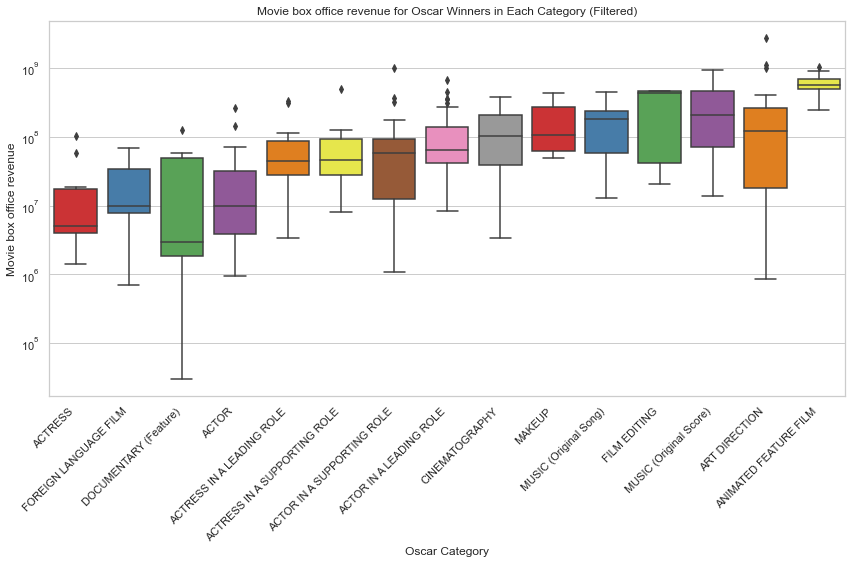

In [341]:
plot_column_by_oscars_category(df_merge_award_unique,'Movie box office revenue' ,True)

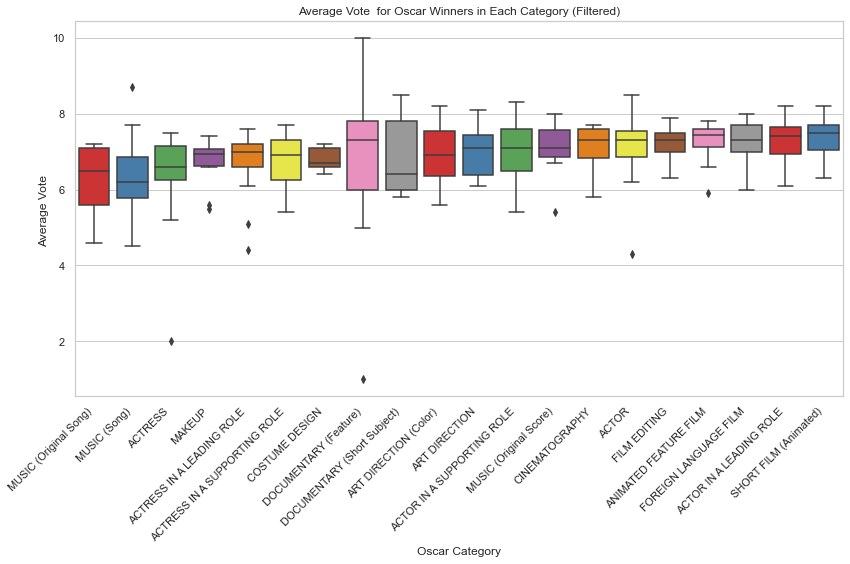

In [342]:
plot_column_by_oscars_category(df_merge_award_unique_filtered,'Average Vote ', False)

As we can see from two box plots shown above, there is a significant difference in box office revenue and ratings between movies that received Oscars based on their category. Movies with Oscars such as best actress (in general) or best documentary generally received lower box office revenue and ratings than movies with Oscars such as best short film or actor. We also notice that the best documentary categories showcase an especially high variability in box office revenue and ratings, which is not the case for the best short film category. All these features indicate thus once again the biases that can be shown in the Oscars awards, which are not always correlated with the success of a movie, even though on a general basis, the Oscars are awarded to movies that have a higher box office revenue and ratings.

#### **Conclusion:** TODO

USA is the country of most movies in the dataset, and the majority of movies are in English. While the correlation of release month and whether the movie wins Oscar award is weak, release timing might still be a significant factor influencing the success of the movie. In the next step, we will introduce the influence of actors and continue to explore how to predict the Oscar possibility of a movie. 

### 3. Research Question 3

#### 3.1 Data Preparation

##### Loading and initial inspection of data.

Movie Dataset

In [ ]:
CMU_MOVIELENSE_PATH = get_path(
    "https://drive.google.com/file/d/1WBm89j51H9meIzF32dAYHzvYtD3AdiW0/view?usp=share_link"
)
RATING_IMDB_ADDITIONAL = get_path(
    "https://drive.google.com/file/d/1TT9c0wWm3F__xrLar-ywt7DcYZUZqJTP/view?usp=share_link"
)

df_movie=pd.read_csv(CMU_MOVIELENSE_PATH)
df_movie.head(1)


IMDB Ratings Dataset

In [ ]:
df_rating=pd.read_csv(RATING_IMDB_ADDITIONAL)
df_rating.head(1)

Here, we notice that same movies have several entries with different number of votes, we take the maximum number

In [ ]:
df_rating[df_rating['title']=="Inception"].tail(5)

In [ ]:
df_sorted = df_rating.sort_values(by=['title', 'numVotes'], ascending=[True, False])
df_filtered = df_sorted.drop_duplicates(subset='title')
df_filtered.head()

Check percentage of missing Box Office Revenues

In [ ]:
missing=(df_movie['Movie box office revenue'].isna()).sum()

print("Missing percentage = " + str(100*missing//df_movie.shape[0])+"%")

Now, to Show why IMDB Rating is needed, the mean and median number of votes is shown for each of the IMDB and CMU Movie Datasets.
It is clear that IDMB dataset is richer

In [ ]:
print("Mean of IMDB number of votes: "+ str(df_filtered['numVotes'].mean()))
print("Mean of CMU number of votes: "+ str(df_movie['Vote Count'].mean()))
print("Median of IMDB number of votes: "+ str(df_filtered['numVotes'].median()))
print("Median of CMU number of votes: "+ str(df_movie['Vote Count'].median()))

In [ ]:
plt.figure(figsize=(10, 6))
df_rating['numVotes'].hist(log=True)
plt.title('Histogram Number of Votes for the IMDB Dataset')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
df_movie["Vote Count"].hist(log=True)
plt.title('Histogram Number of Votes for the CMU Dataset')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.show()

Now, the two data sets are merged useing inner joing based on the movie names

In [ ]:
df_merged=pd.merge(df_filtered, df_movie, left_on='title', right_on='Movie name', how='inner')
df_merged.head(1)

Now, only the maximum number of votes from each of the datasets is kept, and if a rating is NAN, the other is chosen.


In [ ]:
df_merged['votes_number'] = df_merged[['numVotes', 'Vote Count']].max(axis=1)
conditions = [df_merged['averageRating'].isna(), df_merged['Average Vote '].isna(),df_merged['numVotes'] > df_merged['Vote Count'], df_merged['numVotes'] <= df_merged['Vote Count']]
choices = [df_merged['Average Vote '], df_merged['averageRating'], df_merged['averageRating'], df_merged['Average Vote ']]
df_merged['RATING'] = np.select(conditions, choices, default=np.nan)
df_merged.drop(['Vote Count', 'Average Vote ', 'numVotes', 'averageRating'], axis=1, inplace=True)
df_merged.head(1)

In the dataset, we have duplicates due to several rows having different Genres. We drop the duplicates, knowing that only the Genre changes in each row of the same Movie

In [ ]:
df_merged['Movie name']
df_merged=df_merged.drop_duplicates(subset='Movie name')
df_merged.head()

After Merging, check missing Ratings. 0% is missing

In [ ]:
missing=(df_merged['RATING'].isna()).sum()

print("Missing percentage = " + str(100*missing//df_merged.shape[0])+"%")

#### 3.2 Data Analysis
##### Rating Data Early Analysis
Now, Plot a histogram of Ratings and check the mean, median and mode

In [ ]:
data = df_merged["RATING"]
# Calculate histogram bin counts and edges
counts, bin_edges = np.histogram(data, bins=90)  # You can adjust the number of bins
# Calculate bin centers from edges
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
# Plot as a line chart
plt.title('Histogram of Ratings for the Merged Dataset')
plt.xlabel('Number of Votes')
plt.ylabel('Count')

plt.plot(bin_centers, counts, linestyle='solid')
plt.show()

print("Mean of Ratings: " +str(df_merged['RATING'].mean()))
print("Median of Ratings: "+str(df_merged['RATING'].median()))
print("Mode of Ratings: "+ str(df_merged['RATING'].mode()))


Now plot evolution of mean of Ratings and vote numbers for different months. Very little Change is seen, so we look at the number of votes which might give an insight. The number of votes has a higher variance w.r.t months, which might be a good area to explore. This is interesting as movies with low ratings might have high reach and revenue, which is explored later

In [ ]:

df_merged['Release Month'] = pd.Categorical(df_merged['Release Month'], categories=[1,2,3,4,5,6,7,8,9,10,11,12], ordered=True)

# Calculate the average rating for each month
monthly_avg = df_merged.groupby('Release Month')['RATING'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.ylim(6.2,6.5)
plt.title('Average Movie Rating by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

monthly_avg = df_merged.groupby('Release Month')['votes_number'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)

plt.title('Average Number of Votes by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Votes')
plt.show()


Similar insight can be found from boxplots, very close medians and quartiles for different months

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Release Month', y='RATING', data=df_merged[["Release Month","RATING"]])
plt.title('Distribution of Movie Ratings by Release Month')
plt.xlabel('Month')
plt.ylabel('Rating')
plt.show()

Votes number seem to be more interesting

In [ ]:
sns.scatterplot(x='Release Month', y='votes_number', data=df_merged[["Release Month","votes_number"]])
plt.title('Distribution of Movie Ratings by Release Month')
plt.xlabel('Month')
plt.ylabel('Vote number')
plt.show()

Check if there is correlation between Rating and months and Vote number and month. No correlation seems to prevale

In [ ]:
correlation = df_merged['Release Month'].corr(df_merged['RATING'])
print("Rating Correlation coefficient:", correlation)

correlation = df_merged['Release Month'].corr(df_merged['votes_number'])
print("Number of Votes Correlation coefficient:", correlation)

##### Exploring the Box Office Data

Now check the percentage of missing data in the 'box_office' column for each year to see if earlier stages had less documentation of box office revenues, which is true to an extent, since missing data is still high for later years

In [ ]:
df_movie['Release Year'] = df_movie['Release Year'].astype(str)

# Calculate the percentage of missing data in the 'box_office' column for each year
missing_percentage_by_year = df_movie.groupby('Release Year')['Movie box office revenue'].apply(lambda x: (x.isnull().sum() / len(x)) * 100)
plt.figure(figsize=(12, 6))
missing_percentage_by_year.plot()
plt.title('Percentage of Missing Box Office Data Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Missing Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Now we check the Revenues by month to see of there is a correlation. this seems valid as May,June, and july  november, and december seem to have the highest revenues. this is to be explored

In [ ]:
df_movie=df_movie.drop_duplicates(subset='Movie name')
df_movie.dropna(subset=['Movie box office revenue'])
df_movie['Release Month'] = pd.Categorical(df_movie['Release Month'], categories=[1,2,3,4,5,6,7,8,9,10,11,12], ordered=True)

# Calculate the average rating for each month
monthly_avg = df_movie.groupby('Release Month')['Movie box office revenue'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values)

plt.title('Box office revenues by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()



Now, we plot a heat map to show the box office revenues and distribution over different ratings. An interesting this that the highest revenues seem to be for movies with ratings close to the mean and not the upper part of ratings, which is interesting

In [ ]:
data=df_movie
data=data[~data['Average Vote '].isna() & ~data['Movie box office revenue'].isna()]
plt.figure(figsize=(10, 6))
sns.kdeplot(x=data['Average Vote '], y=data['Movie box office revenue'], cmap="Reds", shade=True, bw_adjust=0.5)
plt.title('Density Plot of Box Office Revenue as a Function of Movie Rating')
plt.ylim(0,0.5*10**9)
plt.xlabel('Rating')
plt.ylabel('Box Office Revenue')
plt.show()

##### Conclusions

1- The IMDB dataset, with its higher vote counts, is more robust for analyzing movie popularity than the CMU dataset.

2- Merged data show no missing ratings, allowing for a reliable analysis of movie ratings' distribution, which centers around a mean of 6.3.

3- Monthly variations in the number of votes are more pronounced than in ratings, suggesting that movies can achieve widespread attention regardless of high ratings.

4- Seasonal trends show higher box office revenues during the summer and end-of-year holidays, aligning with typical blockbuster release schedules.

5- The highest-grossing movies have ratings around the mean, implying that exceptional ratings do not necessarily equate to financial success.

### **4. Research Question 4: Actors impact on popularity**

It is well known that the involvement of specific actors in a movie can lead to huge spikes in popularity. Famous actors are often paid millions to participate in a movie based on the belief that this will increase the movie's revenue and popularity. Our aim in this research question will be to investigate to which extend the involvement of such actors influence the box office revenue, the ratings, as well as the awards received. 

For now we only display a short analysis over box office revenue, which will lead to a larger take on this subject once the appropriate dataset is processed. We thus first display the total and mean box office revenue per actor, to understand what kind of figures we are dealing with here:

In [ ]:
# Group by Actor name and sum the box office revenue for each actor
df_unique_movies = df_merge_character.drop_duplicates(subset=['Movie name', 'Actor name'])
actor_revenue_total = df_unique_movies.groupby('Actor name')['Movie box office revenue'].sum()
actor_revenue_total = actor_revenue_total.sort_values(ascending=False).head(50)

In [ ]:
plot_total_box_office(actor_revenue_total)

In [ ]:
actor_revenue_mean = df_unique_movies.groupby('Actor name')['Movie box office revenue'].mean()
actor_revenue_mean = actor_revenue_mean.sort_values(ascending=False).head(50)

plot_total_box_office(actor_revenue_mean)

As we can see from the previous two figures, famous actors such as Samuel L. Jackson or Maggie Smith reach career wide box office of more than 10 billion dollars. However, we understand from the second graph that our dataset needs more processing, since top box office mean revenue actors are people involved as secondary roles in very high grossing movies, such as Avatar or Harry Potter. This is the case of Jason Whyte for example, who only played in Avatar, and thus has a very high grossing average.

It is important to note that the data presented here might be very different than what we expect to see from such a database, since the movie collection stopped in 2012. It is possible that we might have to extend the provided movies in order to actualise our analysis.

Our aim in the analysis following milestone 2 will thus focus on processing our dataset to explore box office revenue and actor choice relations, in order to explore their possible correlation.